In [11]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

from pandas import read_html

print('If this cell runs successfully, it produces no output other than this message.')

If this cell runs successfully, it produces no output other than this message.


**When will the world run out of land to farm?**

   Overpopulation is a growing concern for many reasons, one of which is that food insecurity is already a problem. Right now it takes approximatley 1.5 acres (or about 0.6 hectares) of arable land to feed a single person. The world is currently using about 4,870,000,000 hectares for food production of the 10,400,000,000 sq hectares of habitable land on earth, and we're losing about 10,000,000 sq hectares per year. 
    In our model, we’re looking at a few different things that are changing together. The first is the world population, which is growing. The second is the amount of land used worldwide for farming, which is also growing, but the amount of land used per person is shrinking, and is expected to plateau soon. The third is the amount of land there is available worldwide for farming in total, which is also shrinking.  
   


In [24]:
""""Using population model from chapter 8 notebook"""

filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

un = table2.un / 1e9
census = table2.census / 1e9

def run_simulation_pop(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    
    for t in linrange(system.t_0, system.t_end):
            results[t+1] = update_func(results[t], t, system)
        
    return results
    results_pop = results
    
t_0 = 1960
t_end = get_last_label(census)
p_0 = get_first_value(census)

2.557628654

In [25]:
def update_func_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

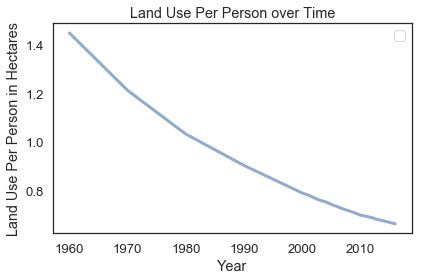

In [26]:
"""land use per person data - taken from world bank data"""

years = [1960, 1970, 1980, 1990, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
         2011, 2012, 2013, 2014, 2015, 2016]

land_use_pp_data = [1.447597, 1.21181, 1.032673, 0.90396, 0.790879, 0.782416, 0.771913, 0.761173, 0.754623, 0.743984, 0.735177, 
               0.725472, 0.717784, 0.709851, 0.699982, 0.695036, 0.689642, 0.681448, 0.676474, 0.670103, 0.664506]


plot (years, land_use_pp_data)

decorate(xlabel='Year', 
        ylabel='Land Use Per Person in Hectares',
        title='Land Use Per Person over Time')

In [27]:
"""variables for land use pp model 1"""


systemLandPP = System(alpha = 60,
                      r = .005,
                      k = .25, #carrying capacity of .25 hectares
                     t_0 = 1960,
                     r_0 = 1.447597)

,values
alpha,60.000000
r,0.005000
k,0.250000
t_0,1960.000000
r_0,1.447597


In [28]:
"""model for 1960-1980"""

def land_PP_change1(land_use_pp, system):

    pp_decline = land_use_pp/system.alpha 
    return land_use_pp - pp_decline

In [29]:
"""model for 1980 on"""

def land_PP_change2(land_use_pp, system):

    pp_decline = system.r * land_use_pp * (1-land_use_pp/system.k)
    return land_use_pp + pp_decline

In [30]:
def run_simulation_PP(system):

    results = TimeSeries()
    results[system.t_0] = system.r_0
    
    for t in linrange(1960, 2016, 1):
        if t < 1980:
            results[t+1] = land_PP_change1(results[t], system)
        else:
            results[t+1] = land_PP_change2(results[t], system)
    return results

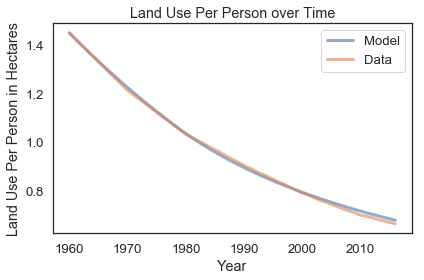

In [31]:
results = run_simulation_PP(systemLandPP)

plot (results, label='Model')
plot (years, land_use_pp_data, label='Data')

decorate(xlabel='Year', 
        ylabel='Land Use Per Person in Hectares',
        title='Land Use Per Person over Time')

Graph of data and model (0.25 hectare carrying capacity) of land use per person from 1960 - 2016.

In [32]:
def run_simulation_PP(system):

    results = TimeSeries()
    results[system.t_0] = system.r_0
    
    for t in linrange(1960, 2500, 1):
        if t < 1980:
            results[t+1] = land_PP_change1(results[t], system)
        else:
            results[t+1] = land_PP_change2(results[t], system)
    return results

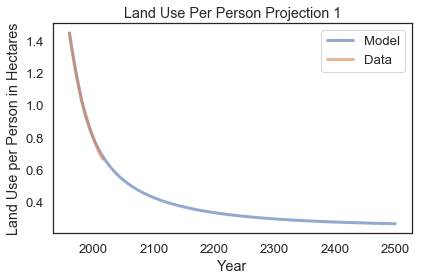

In [33]:
results = run_simulation_PP(systemLandPP)
plot (results, label='Model')
plot (years, land_use_pp_data, label='Data')

decorate(xlabel='Year', 
        ylabel='Land Use per Person in Hectares',
        title='Land Use Per Person Projection 1')

Prediction of land use per person from 2016 - 2500 with 0.25 hectare carrying capacity.

In [35]:
newTS = TimeSeries()
for i in list(results.keys()):
    newTS[i] = results[i] * results_pop[i]
    
plot(newTS, label='Land in Use')
decay_sim(land_decay_big)
decay_sim(land_decay_smol)


decorate(xlabel='Year', 
        ylabel='Land in Billions of Hectares',
        title='Land Use vs Land Avaialable over Time')

NameError: name 'results_pop' is not defined

Orange line is the conservative land decay model
                                                   /////// Green line is what would happen if land decay continues at the rate it's going

In [105]:
#changing carrying capacity to 0.5 hectares to reflect the possibility of other countries beginning to eat more like the US
systemLandPP2 = System(alpha = 60,
                      r = .17,
                      k = 1.2,
                     t_0 = 1960,
                     r_0 = 1.447597)

,values
alpha,60.000000
r,0.170000
k,1.200000
t_0,1960.000000
r_0,1.447597


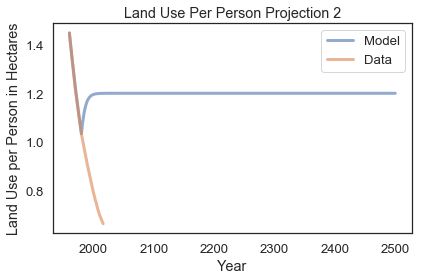

In [106]:
results = run_simulation_PP(systemLandPP2)

plot (results, label='Model')
plot (years, land_use_pp_data, label='Data')

decorate(xlabel='Year', 
        ylabel='Land Use per Person in Hectares',
        title='Land Use Per Person Projection 2')

Graph of data and model (0.5 hectare carrying capacity) of land use per person from 1960 - 2016.

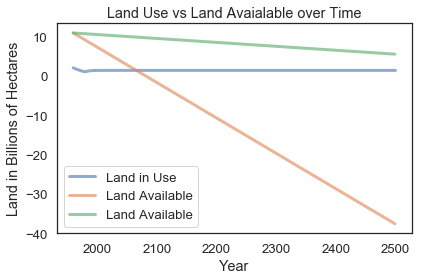

In [107]:
newTS = TimeSeries()
for i in list(results.keys()):
    newTS[i] = results[i] * results[i]
    
plot(newTS, label='Land in Use')
decay_sim(land_decay_smol)
decay_sim(land_decay_big)

decorate(xlabel='Year', 
        ylabel='Land in Billions of Hectares',
        title='Land Use vs Land Avaialable over Time')

This model has a different carrying capacity

**Results and Interpretation**

We found from this modeling excersize that the land per person doesn't have a large effect on whether or not we have enough land to feed the planet. Currently, the world average for land used for farming per person is around .6 hectares. Based on how much this has declined in the last 60 years, we estimated that farming would get so efficient that we could use as little as .25 hectares per person eventually. However, experts estimate that the growth of population combined with the changing diets of people in countries like China and India would necessitate twice the amount of cropland used total.  

From our model, we can see that land degredation is a much more important factor in determining whether we have enough land to grow food than the amount of land used per person. Some estimates say that 35% of land that was usable 40 years ago is no longer usable for farmland. Using this to guide our model, we found that we would use 100% of our arable land for food around the year 2100 regardless of how much land is used per person. Other estimates say we only lose about 10,000,000 sq hectares per year. Using this parameter, the Earth won't run out of land to farm on by the year 2500 using either of the land per person models. 


















